In [3]:
import pandas as pd

In [16]:
long = pd.read_csv("long.csv")
long.head(20)

,Unnamed: 0,length,steps
0,0,0.400000,1371.0
1,1,0.400000,8392.0
2,2,0.400000,19167.0
3,3,0.400000,5523.0
4,4,0.400000,2159.0
5,5,0.400000,19079.0
6,6,0.400000,19513.0
7,7,0.400000,4616.0
8,8,0.400000,2921.0
9,9,0.400000,5641.0


In [18]:
long['id'] = long['Unnamed: 0']%10

In [19]:
long_means = long.groupby('id').mean()
long_means

,Unnamed: 0,length,steps
id,,,
0,145.0,1.1,20353.500000
1,146.0,1.1,21420.633333
2,147.0,1.1,24486.500000
3,148.0,1.1,14676.633333
4,149.0,1.1,12893.833333
5,150.0,1.1,20965.900000
6,151.0,1.1,21936.400000
7,152.0,1.1,22326.300000
8,153.0,1.1,15982.200000


In [20]:
uniform = pd.read_csv('uniform.csv')
uniform.head()

,Unnamed: 0,length,steps
0,0,0.4,516.0
1,1,0.4,504.0
2,2,0.4,506.0
3,3,0.4,506.0
4,4,0.4,506.0


In [21]:
uniform['id'] = uniform['Unnamed: 0']%10

In [23]:
uniform_means = uniform.groupby('id').mean()
uniform_means

,Unnamed: 0,length,steps
id,,,
0,145.0,1.1,15815.666667
1,146.0,1.1,22787.566667
2,147.0,1.1,25704.633333
3,148.0,1.1,28767.600000
4,149.0,1.1,20198.333333
5,150.0,1.1,10237.633333
6,151.0,1.1,12503.333333
7,152.0,1.1,18319.966667
8,153.0,1.1,18793.666667


In [24]:
short = pd.read_csv('short.csv')
short.head()

,Unnamed: 0,length,steps
0,0,0.4,283.0
1,1,0.4,542.0
2,2,0.4,334.0
3,3,0.4,502.0
4,4,0.4,346.0


In [25]:
short['id'] = short['Unnamed: 0']%10

In [26]:
short_means = short.groupby('id').mean()
short_means

,Unnamed: 0,length,steps
id,,,
0,145.0,1.1,3774.666667
1,146.0,1.1,3411.433333
2,147.0,1.1,5640.566667
3,148.0,1.1,1902.133333
4,149.0,1.1,3145.533333
5,150.0,1.1,1838.833333
6,151.0,1.1,6367.866667
7,152.0,1.1,5103.700000
8,153.0,1.1,4511.800000


/tmp/ipython-input-1071773625.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


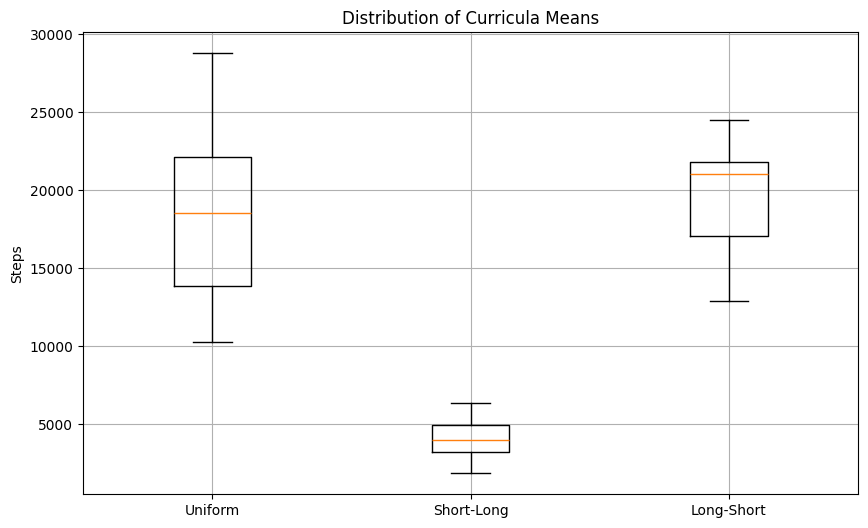

In [37]:
import matplotlib.pyplot as plt
import numpy as np

data = [uniform_means['steps'], short_means['steps'], long_means['steps']]
labels = ['Uniform', 'Short-Long', 'Long-Short']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Distribution of Curricula Means')
plt.ylabel('Steps')
plt.grid(True)
plt.show()

In [27]:
from scipy import stats

In [30]:
uniform_means['steps'].mean() , long_means['steps'].mean(), short_means['steps'].mean()

(np.float64(18631.696666666667),
 np.float64(19618.946666666667),
 np.float64(3988.336666666667))

In [39]:
uniform_means['steps'].std() , long_means['steps'].std(), short_means['steps'].std()

(5945.930548577419, 3759.574001517843, 1491.1172492380701)

In [31]:
stats.ttest_ind(long_means['steps'], uniform_means['steps'], alternative='greater')

TtestResult(statistic=np.float64(0.44378748956267133), pvalue=np.float64(0.33124244317702134), df=np.float64(18.0))

In [33]:
# non-sense, since short has a lower mean
stats.ttest_ind(short_means['steps'], uniform_means['steps'], alternative='less')

TtestResult(statistic=np.float64(-7.553994735883707), pvalue=np.float64(2.746536917676535e-07), df=np.float64(18.0))

In [38]:
stats.ttest_ind(long_means['steps'], short_means['steps'], alternative='greater')

TtestResult(statistic=np.float64(12.221179346066293), pvalue=np.float64(1.879419932676226e-10), df=np.float64(18.0))

Assert minum levels

In [43]:
uniform['steps'].min(), short['steps'].min(), long['steps'].min()

(504.0, 234.0, 245.0)